Henry (Hank) Besser

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random as rng
%matplotlib inline

#### Problem under study: 

The motion of a particle or molecule in solution is analogous to a random walk. It is convenient to think about diffusion of the random process (a random walk simulation of "particles" on a 2d square lattice) as diffusion of cream in coffee. The goal for this exploration is to consider the cream in coffee problem from the view of nonequilibrium statistical mechanics and use it to illustrate how a system approaches equilibrium.

In looking at diffusion of particles in 2d space it is important discuss how it relates to the second law of thermodynamics and the manner in which systems approach equilibrium. Therefore, it is useful to look at the entropy of the system. A perfectly ordered system has zero entropy. A disordered one has large entropy. Also, entropy of a closed system will either remain the same or increase with time. The statistical definition of entropy is as follows:




$$ Equation 1: S =  \sum_{i} P_{i} lnP_{i}$$


where the sum is over all the possible states of the system and $P_{i}$ is the probability of finding the system in state $i$. This can be thought of as dividing the system into a square grid ($64X64$ for this exercise). An important distinction is that this grid is not related to the square lattice that the walkers move on. The grid is merely a way to partition space, each partition representing a distinct in which a particle has a possibility of being found.

### Methods and Algorithms: Thorough Descriptions in the Code

The Methods and Algorithms is divided into three functionalities. 
- The random walk (free diffusion)
- Entropy (calling the random walk and calculating the system's entropy)
- Diffusion confined in space- only account for particles in a fixed boundary (cream contained in coffee)

In [2]:
def random_walk(num_steps, num_walkers):
    """
    Generating the random walk data, for statistically
    independent random variables. This for a 2D random walk.
    
    The two arrays, x_coord and y_coord, 
    contain the coordinates of ALL the random walkers, 
    making it easy to access the a certain position at 
    a specified step number for all the walkers. 
    
    """ 
    # to store x position for all the walkers
    x_coord = np.zeros((num_walkers,num_steps))
    
    # to store y position for all the walkers
    y_coord = np.zeros((num_walkers,num_steps))
    
    
    
    for j in range(num_walkers):
    
        # generate random steps +/- 1
        x = ( 2*(rng(num_steps) > 0.5) - 1).cumsum() 
        # generate random steps +/- 1
        y = ( 2*(rng(num_steps) > 0.5) - 1).cumsum()

        #store data
        x_coord[j,:]=x
        #store data
        y_coord[j,:]=y
    
    #return variables for plotting   
    return x_coord,y_coord,num_steps,num_walkers
    

In [3]:
def entropy(num_steps,num_walkers,nbins):
    
    """
    
    Finds the entropy of the system (given a specified number
    of steps and walkers)
    
    First: Generating the random walk data, for statistically
    independent random variables..no contraints 
    
    
    Second: given this data, computes the entropy of the system
    by finding the probability that a particle resides in the certain
    part in the sqaure lattice.
    This is done using the grid method (nbins by nbins) where
    the xedges and yedges for the histogram are evenly partioned with
    nbins # of bins.
 
    """ 
    
    #call to the pseudo-instance (i.e the method-like usage of the
    #random walk function)
    x_coord_e,y_coord_e,num_steps_e,num_walkers_e =\
    random_walk(num_steps=num_steps, num_walkers=num_walkers)
    
    #
    xedges = np.linspace(-1*num_steps_e,num_steps_e,nbins+1) 
    yedges = np.linspace(-1*num_steps_e,num_steps_e,nbins+1)
    
    #calaculate entropy at each time step
    Entropy = np.zeros(num_steps_e)
    
    
    
    #Loop: x_coord and y_coord are read at each time-step(num_steps)
    #these values are used to calculate their histograms 
    for s in range(num_steps_e):
        histo=np.histogram2d(x_coord_e[:,s],y_coord_e[:,s],bins=(xedges,yedges))
    
        #probability measure for finding the walkers at position[i,j] in grid    
        prob = histo[0]/sum(sum(histo[0]))
    
        v=0
  
   
        for i in range(nbins):
            for j in range(nbins):
            
                if(prob[i,j]>0):
                    #using the entropy equation
                    v+=-prob[i,j]*np.log(prob[i,j])
                    Entropy[s]=v
    
    #return values for plotting
    return Entropy,x_coord_e,y_coord_e,num_steps_e,num_walkers_e

In [4]:
def diffusion_confined_space(num_steps,num_walkers):

    """
    Generating the random walk data, for statistically
    independent random variables. This for a 2D random walk.
    
    The two arrays, x_coord and y_coord, 
    contain only the particles in the
    specified coordinates: contrained to -100 to 100 for both axes
    (i.e 200X200 coordinate system--square lattice). 
    
    """ 
    # to store x position for all the walkers
    x_coord = np.zeros((num_walkers,num_steps))
    
    # to store y position for all the walkers
    y_coord = np.zeros((num_walkers,num_steps))
    
    
    
    for j in range(num_walkers):
    
        # generate random steps +/- 1
        x = ( 2*(rng(num_steps) > 0.5) - 1).cumsum() 
        # generate random steps +/- 1
        y = ( 2*(rng(num_steps) > 0.5) - 1).cumsum()
       
        #store data
        x_coord[j,:]=x
        
        #store data
        y_coord[j,:]=y

    #fills all values outside boundary with np.nan  
    for i in range(num_walkers):
        for j in range (num_steps):
            if 100<x_coord[i,j] or x_coord[i,j]<-100 or\
            100<y_coord[i,j] or y_coord[i,j]<-100: 
                x_coord[i,j] = np.nan
                y_coord[i,j] = np.nan
    
    #return variables for plotting   
    return x_coord,y_coord,num_steps,num_walkers 

### Analysis

In [5]:
#Entropy and Free Diffusion
#must restart kernel if you want this script more than once

entropy,x_coord_free,y_coord_free,num_steps_free,num_walkers_free =\
entropy(num_steps=1700, num_walkers=1000,nbins=64)

In [6]:
#Constrained on 200 X 200 Sqaure Lattice

x_coord_bound,y_coord_bound,num_steps_bound,num_walkers_bound=\
diffusion_confined_space(num_steps=1700,num_walkers=1000)

<function matplotlib.pyplot.show>

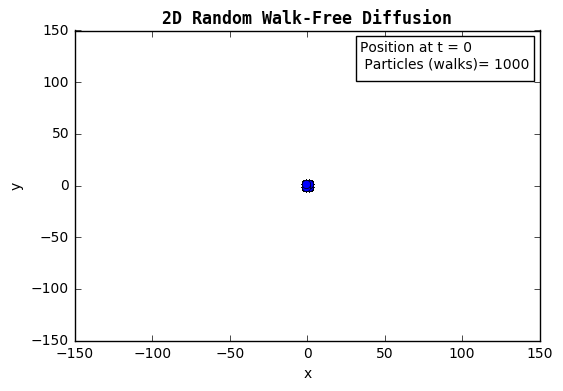

In [7]:
plt.figure()
ax = plt.gca()
#plot the position of random walkers before first step
plt.plot(x_coord_free[:,0],y_coord_free[:,0],'o')
plt.xlabel("x")
plt.ylabel("y")
ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_title('2D Random Walk-Free Diffusion',\
family='monospace',size=12, weight='bold')
ax.legend("",title='Position at t = %s \n Particles (walks)= %s'\
          %(0,num_walkers_free),loc=1,fontsize=8) 
plt.show

<function matplotlib.pyplot.show>

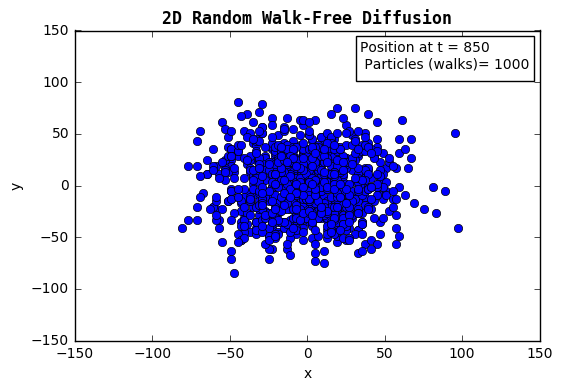

In [9]:
plt.figure()
ax = plt.gca()
#plot the position of random walkers at the num_steps/2 step
plt.plot(x_coord_free[:,int(num_steps_free/2)],y_coord_free[:,int(num_steps_free/2)],'o')
plt.xlabel("x")
plt.ylabel("y")
ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_title('2D Random Walk-Free Diffusion',\
family='monospace',size=12, weight='bold')
ax.legend("",title='Position at t = %s \n Particles (walks)= %s'\
          %(int(num_steps_free/2),num_walkers_free),loc=1,fontsize=8) 
plt.show

<function matplotlib.pyplot.show>

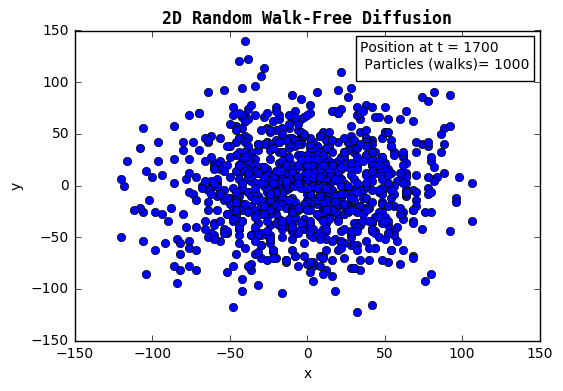

In [10]:
plt.figure()
ax = plt.gca()
#plot the position of random walkers at the last step
plt.plot(x_coord_free[:,-1],y_coord_free[:,-1],'o')
plt.xlabel("x")
plt.ylabel("y")
ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_title('2D Random Walk-Free Diffusion',\
family='monospace',size=12, weight='bold')
ax.legend("",title='Position at t = %s \n Particles (walks)= %s'\
          %(num_steps_free,num_walkers_free),loc=1,fontsize=8) 
plt.show

<function matplotlib.pyplot.show>

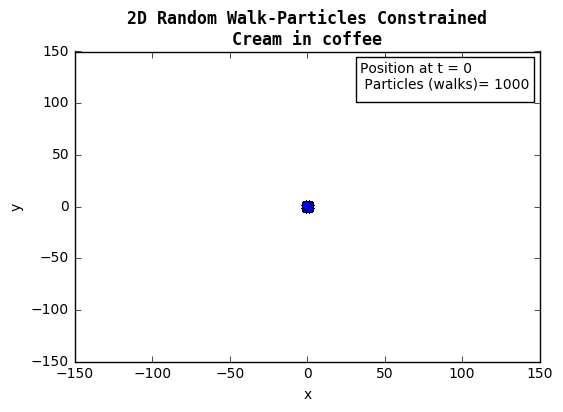

In [11]:
plt.figure()
ax = plt.gca()
#plot the position of random walkers before the first step
plt.plot(x_coord_bound[:,0],y_coord_bound[:,0],'o')
plt.xlabel("x")
plt.ylabel("y")
ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_title('2D Random Walk-Particles Constrained\n\
Cream in coffee',\
family='monospace',size=12, weight='bold')
ax.legend("",title='Position at t = %s \n Particles (walks)= %s'\
          %(0,num_walkers_free),loc=1,fontsize=8)  
plt.show

<function matplotlib.pyplot.show>

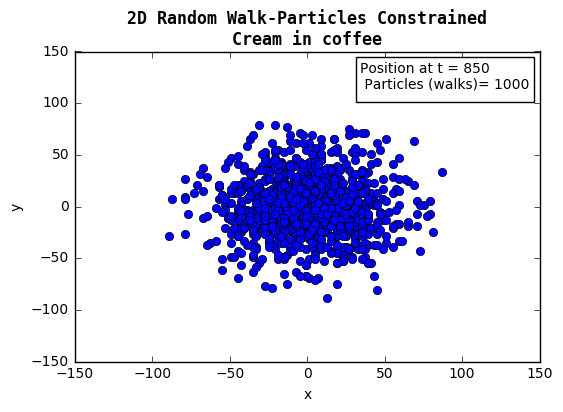

In [12]:
plt.figure()
ax = plt.gca()
#plot the position of random walkers at the num_steps/2 step
plt.plot(x_coord_bound[:,int(num_steps_bound/2)],y_coord_bound[:,int(num_steps_bound/2)],'o')
plt.xlabel("x")
plt.ylabel("y")
ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_title('2D Random Walk-Particles Constrained\n\
Cream in coffee',\
family='monospace',size=12, weight='bold')
ax.legend("",title='Position at t = %s \n Particles (walks)= %s'\
          %(int(num_steps_free/2),num_walkers_free),loc=1,fontsize=8) 
plt.show

<function matplotlib.pyplot.show>

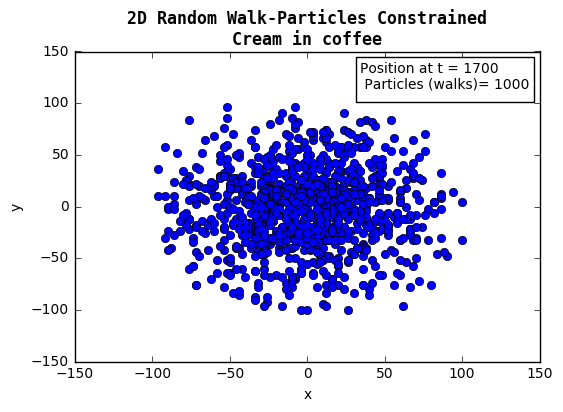

In [13]:
plt.figure()
ax = plt.gca()
#plot the position of random walkers at the last step
plt.plot(x_coord_bound[:,-1],y_coord_bound[:,-1],'o')
plt.xlabel("x")
plt.ylabel("y")
ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_title('2D Random Walk-Particles Constrained\n\
Cream in coffee',\
family='monospace',size=12, weight='bold')
ax.legend("",title='Position at t = %s \n Particles (walks)= %s'\
          %(num_steps_free,num_walkers_free),loc=1,fontsize=8) 
plt.show

### Figure 1: 

Random walk simulation: "diffusion of hypothetical cream in coffee (or particles in solution)". 

- Cream at three different snapshot (t=0,t=number of steps/2,and t= the last step) when particles were NOT constrained--i.e free diffusion.
- Cream at three different snapshot (same times as free-diffusion plots; t=0,t=number of steps/2,and t= the last step) when particles were ARE constrained--All the particles were constrained to a 200X200 square lattice (-100 < x < 100) and (-100 < x < 100).

<function matplotlib.pyplot.show>

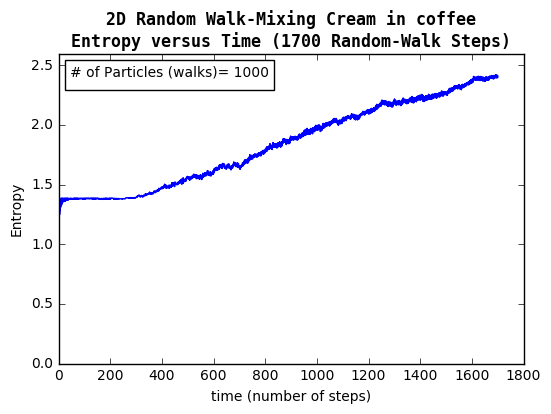

In [14]:
plt.figure()
ax = plt.gca()
#Entropy
plt.plot(np.arange(1,num_steps_free+1),entropy)
plt.xlabel("time (number of steps)")
plt.ylabel("Entropy")
ax.set_ylim(bottom=0)
ax.set_title('2D Random Walk-Mixing Cream in coffee\n\
Entropy versus Time (%s Random-Walk Steps)' %(num_steps_free),\
family='monospace',size=12, weight='bold')
ax.legend("",title='# of Particles (walks)= %s'\
          %(num_walkers_free),loc=2,fontsize=9) 
plt.show    

### Figure 2: 

Entropy as a function of time (all the random walks) for hypothetical particles in solution, calculated from the the same simulation that created the snapshots used for the free-diffusion plot in figure 1. The grid used to calculate the entropy had 64 X 64 = 4096 cells.   

### Results:

#### Distributions for free diffusion and constrained:


The square blue masses at t= 0 for both examples are the "cream" particles. The distributions after 850 and 1700 are shown for both examples in figure 1. As expected, the "cream" spreads with time in a manner that appears to be diffusive. In visually noting the differences between the two sets of examples, one can see that at the snapshot for last time step in the plot constrained by "walls" at x= +/- 100 and y= +/- 100 (i.e a 200X200 square lattice)...therefore there are not particles beyond 100 in both directions. However,for the plot representing the snapshot for last time step in the free diffusion example, there are no walls..therefore there are particles beyond 100 in the x and y direction. 


#### Entropy:

Using the particle positions from the random walk simulation for the free diffusion examples (using the random walk function explained in methods section), the probabilities were calculated and Entropy $S$ was evaluated (using the entropy function explained in methods section)– plot shown in figure 2. The behavior is in accordance with the intuition of the “cream” in cream-in-coffe example. The system is initially in a highly ordered state with a low value of $S$. As time passes, the entropy increases (only on average as there are many slight fluctuations as time increases as well). Through statistical inference this does hold (on average) with the Second Law of Thermodynamics. The statistical variation decreases when more particles are in the system. In terms of macroscopic situations in everyday life (like that of the “cream” in coffe example) the probability that the seconds law will be violated is practically zero. However, for systems with a small number of particles, the entropy would show significant deviation from the predictions
of classical thermodynamics such as the second law of thermodynamics. So overall, because the
entropy versus time plotted is based on a probability measure the entropy is in accordance to the
second law of thermodynamics on average (with probability of violating the law decreasing when
there are more particles in the system).